**FARADISHA ALDINA PUTRI - 2141720159 - TI 3I**

***MODUL 12 – Fitur Matching, Face Detection, Face Tracking*** *(English VERSION)*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

**2. Perform  Face  Detection  for  other  image  objects  available  at  (/  images  /  facedet)  as shown in the following example.**

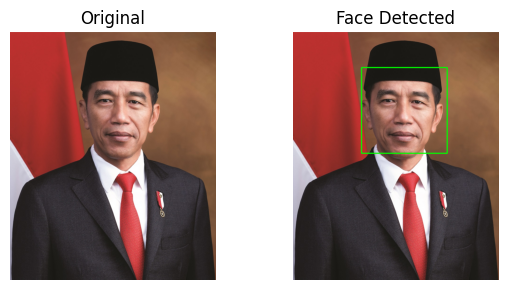

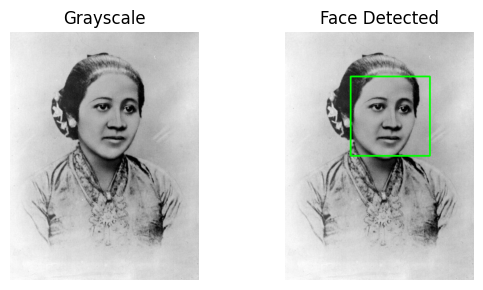

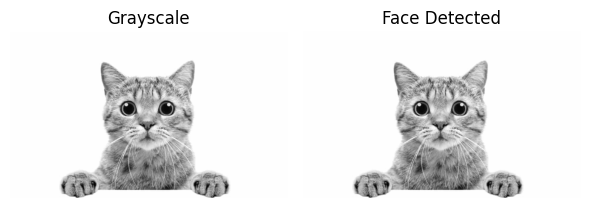

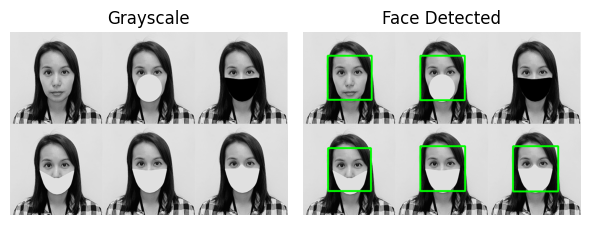

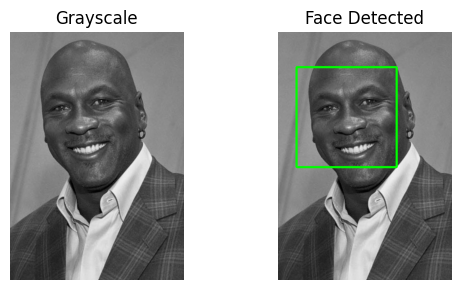

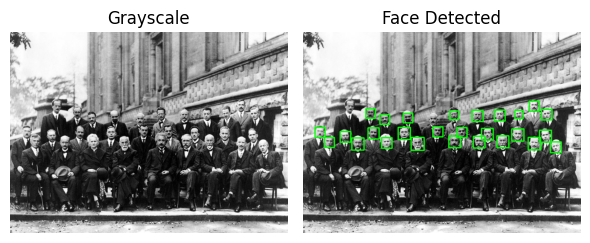

In [3]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

# Load the face cascade classifier
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_Fara/haarcascades/haarcascades/haarcascade_frontalface_alt.xml')

# Path to the folder containing the images
folder_path = '/content/drive/MyDrive/PCVK_Fara/facedet'

# List of image filenames you want to display
image_filenames = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

# Iterate over the specified image filenames
for filename in image_filenames:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, filename)

    # Read the image in grayscale for non-'jokowi.jpg' images
    if 'jokowi.jpg' != filename:
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    else:
        # Read the original image in color for 'jokowi.jpg'
        image = cv.imread(image_path)

    # Convert the image to RGB for displaying with Matplotlib
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Detect faces in the image
    roi_wajah = cascade_wajah.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)

    # Create a subplot to display original and processed images
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    # Display the original image
    axes[0].imshow(image_rgb)
    axes[0].set_title('Original' if 'jokowi.jpg' == filename else 'Grayscale')
    axes[0].axis('off')

    # Draw rectangles around the detected faces (green color)
    image_with_rect = image_rgb.copy()
    for (x, y, w, h) in roi_wajah:
        cv.rectangle(image_with_rect, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # Display the processed image with the detected faces
    axes[1].imshow(image_with_rect)
    axes[1].set_title('Face Detected')
    axes[1].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

**3. In Problem No.2. cat faces cannot be detected properly. Detect the cat's face until a rectangle appears on the face.**

For instructions on this problem, pay attention to the pretrained features that OpenCV has provided. Use the existing xml if one is provided. If you don't have it, try searching by searching through search engines.  

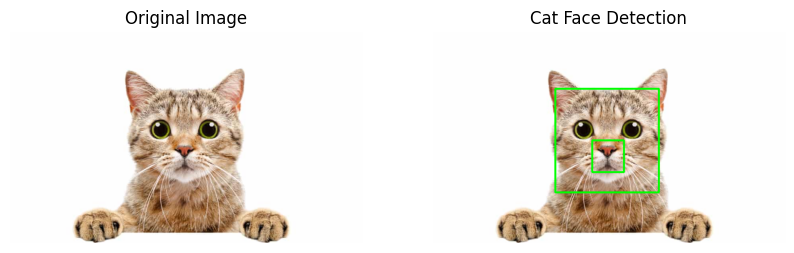

In [4]:
# Load the cat image
kucing = cv.imread('/content/drive/MyDrive/PCVK_Fara/facedet/kucing.jpg')

# Create a copy for face detection
kucing_face_detected = kucing.copy()

# Your cat face cascade for detection
cascade_kucing = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalcatface.xml")

# Detect faces in the 'kucing' image
roi_wajah_kucing = cascade_kucing.detectMultiScale(kucing_face_detected)

# Draw rectangles around the detected cat faces
for (x, y, w, h) in roi_wajah_kucing:
    cv.rectangle(kucing_face_detected, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the original 'kucing' image and image with cat face detection
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(kucing, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(kucing_face_detected, cv.COLOR_BGR2RGB))
ax[1].set_title('Cat Face Detection')
ax[1].axis('off')

plt.show()

**4. Also try it for an eyes detection.**

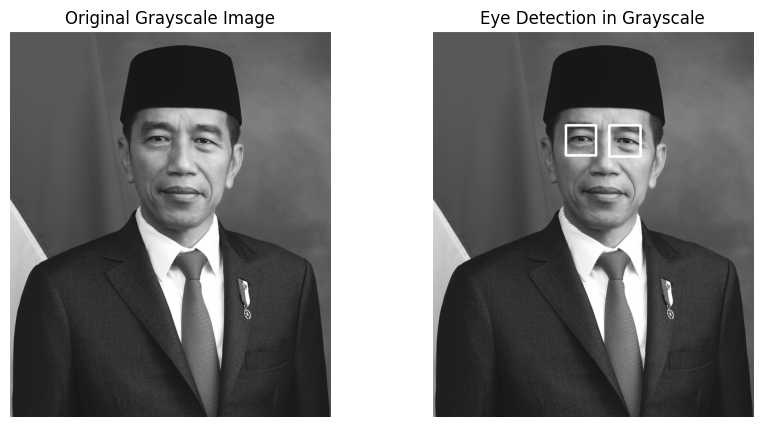

In [5]:
# Load the image
jokowi = cv.imread('/content/drive/MyDrive/PCVK_Fara/facedet/jokowi.jpg')
jokowi_face_detected = jokowi.copy()

# Detect faces
roi_wajah = cascade_wajah.detectMultiScale(jokowi_face_detected)

# Your eye cascade for eye detection
cascade_mata = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

# For each face, detect eyes and draw rectangles around the eyes
for (x, y, w, h) in roi_wajah:
    face_roi = jokowi_face_detected[y:y+h, x:x+w]  # Extract the face region
    eyes = cascade_mata.detectMultiScale(face_roi)

    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(face_roi, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 5)

# Convert the 'jokowi_face_detected' image to grayscale
jokowi_face_detected_gray = cv.cvtColor(jokowi_face_detected, cv.COLOR_BGR2GRAY)

# Display the original 'jokowi' image in grayscale and the 'jokowi_face_detected' image with eye detection in grayscale
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY), cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(jokowi_face_detected_gray, cmap='gray')
ax[1].set_title('Eye Detection in Grayscale')
ax[1].axis('off')

plt.show()

5. Implement  Face  Tracking  using  Google  Colab. Instructions,  complete  tutorials  on  camera
access and FaceDetection on google colab can be seen at the following
link: https://www.youtube.com/watch?v=YjWh7QvVH60

In [6]:

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

## **Helper Functions**
Below are a few helper function to make converting between different image data types and formats.

In [7]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

## **Haar Cascade Classifier**

For this tutorial we will run a simple object detection algorithm called Haar Cascade on our images and video fetched from our webcam. OpenCV has a pre-trained Haar Cascade face detection model.

In [8]:

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

## **Webcam Images**

Running code on images taken from webcam is fairly straight-forward. We will utilize code within Google Colab's Code Snippets that has a variety of useful code functions to perform various tasks.

We will be using the code snippet for Camera Capture to utilize your computer's webcam.

In [9]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename



<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


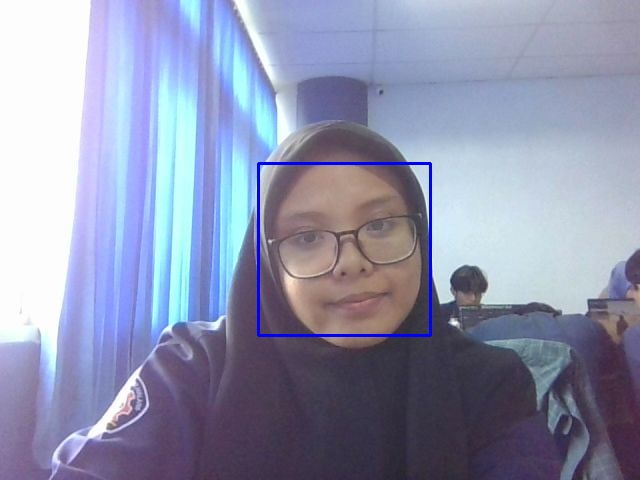

In [10]:

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


## **Webcam Videos**
Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream.

In [11]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [12]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes



<IPython.core.display.Javascript object>

**6. Blur the detected part of the face. Hint: you can use cv.medianBlur to give a blur effect.**

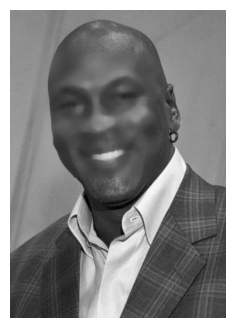

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the face cascade classifier
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_Fara/haarcascades/haarcascades/haarcascade_frontalface_alt.xml')

# Load the image
jordan = cv.imread('/content/drive/MyDrive/PCVK_Fara/facedet/mjordan.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(jordan, cv.COLOR_BGR2GRAY)

# Detect faces in the image
roi_wajah = cascade_wajah.detectMultiScale(gray)

# Iterate over the detected faces
for (x, y, w, h) in roi_wajah:
    # Crop the face region
    face_roi = jordan[y:y+h, x:x+w]

    # Apply median blur to the face region
    blurred_face = cv.medianBlur(face_roi, 15)

    # Convert the blurred face to grayscale
    blurred_face_gray = cv.cvtColor(blurred_face, cv.COLOR_BGR2GRAY)

    # Replace the face region with the blurred face
    jordan[y:y+h, x:x+w] = cv.cvtColor(blurred_face_gray, cv.COLOR_GRAY2BGR)

# Display the image with the blurred faces in grayscale
plt.figure(figsize=(8, 4))
plt.imshow(cv.cvtColor(jordan, cv.COLOR_BGR2GRAY), cmap='gray')  # Display in grayscale
plt.axis('off')
plt.show()
